<a href="https://colab.research.google.com/github/junho2000/pytorch-practice/blob/main/pytorch_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tensor 다루기

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

nums = torch.arange(9)
nums.numpy()
nums.reshape(3,3)

# nums = torch.arange(9).reshape(3, 3)
# nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [ ]:
torch.tensor([[1,2],[3,4]])
torch.tensor([[1,2],[3,4.]], device="cuda:0") #use gpu

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

In [ ]:
torch.tensor([[1,2],[3,4]],dtype=torch.float64)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [ ]:
torch.arange(0,10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
torch.zeros(3,5).to('cuda:0') #use gpu
#to('cuda:0') / device="cuda:0"

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], device='cuda:0')

In [ ]:
t = torch.randn(3, 5)
t.size()
#t.shape

torch.Size([3, 5])

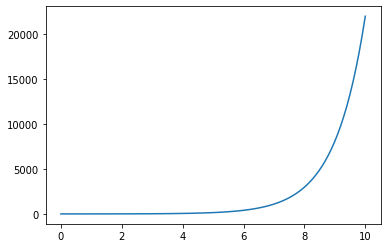

In [ ]:
x = torch.linspace(0, 10, 100)
y = torch.exp(x)

plt.plot(x.numpy(), y.numpy())

In [ ]:
t = torch.tensor([[1,2,3],[4,5,6.]])
print(t[0,2])
print(t[:,:2])
t[t > 3] = 10
#t[:, 1] = 10
t

tensor(3.)
tensor([[1., 2.],
        [4., 5.]])


tensor([[ 1.,  2.,  3.],
        [10., 10., 10.]])

In [ ]:
v = torch.tensor([1,2,3.])
w = torch.tensor([0, 10, 20])

m = torch.tensor([[0, 1, 2], [100, 200, 300.]])

m2 = m + m

m2

tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])

In [ ]:
#tensor dimension control

x1 = torch.tensor([
    [1, 2], [3, 4.]
])

x2 = torch.tensor([
    [10, 20, 30], [40, 50, 60.]
])

#x1.view(4,1)
x1.reshape(4,1)

x1.view(-1)
#x1.reshape(-1)

#x1.view(-1,1)
x1.reshape(-1,1)

print(x2.t()) #transpose

print(torch.cat([x1,x2], dim=1))

hwc_img_data = torch.rand(100, 64, 32, 3)
chw_img_data = hwc_img_data.transpose(1,2).transpose(1,3)
chw_img_data.size()

tensor([[10., 40.],
        [20., 50.],
        [30., 60.]])
tensor([[ 1.,  2., 10., 20., 30.],
        [ 3.,  4., 40., 50., 60.]])


torch.Size([100, 3, 64, 32])

In [ ]:
torch.torch.randperm(5)
torch.arange(0,3,step=0.5) #torch.arange(시작, 끝, step)

tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000])

In [ ]:
torch.cuda.FloatTensor([2,3])

tensor([2., 3.], device='cuda:0')

In [ ]:
x = torch.cuda.FloatTensor([2,3])
x.type_as(torch.cuda.IntTensor()) #type change in cuda

tensor([2, 3], device='cuda:0', dtype=torch.int32)

In [ ]:
x1 = np.ndarray(shape=(2,3), dtype=int, buffer=np.array([1,2,3,4,5,6]))

x = torch.from_numpy(x1)

x2 = torch.from_numpy(x1)
print(x2.numpy())
print(x2)


[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
x = torch.FloatTensor([[1,2,3],[4,5,6]])
x_gpu = x.cuda()
print(x_gpu)

x_cpu = x_gpu.cpu()
print(x_cpu)
x.size()

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')
tensor([[1., 2., 3.],
        [4., 5., 6.]])


torch.Size([2, 3])

In [ ]:
x = torch.rand(4,3)
print(x)
print(torch.index_select(x,0,torch.tensor([0,2])))
#input, dim, index

#torch.LongTensor([0,2])
#torch.tensor([0,2])

print(x[:,0].view(-1,1))
print(x[0,:])

x[0:2,0:2]

tensor([[0.5521, 0.9945, 0.4801],
        [0.2009, 0.7143, 0.3598],
        [0.7185, 0.0875, 0.3665],
        [0.5672, 0.2711, 0.7601]])
tensor([[0.5521, 0.9945, 0.4801],
        [0.7185, 0.0875, 0.3665]])
tensor([[0.5521],
        [0.2009],
        [0.7185],
        [0.5672]])
tensor([0.5521, 0.9945, 0.4801])


tensor([[0.5521, 0.9945],
        [0.2009, 0.7143]])

In [ ]:
x = torch.randn(2,3)
print(x)
mask = torch.BoolTensor([[0,0,1],[0,1,0]])
print(mask)
torch.masked_select(x,mask)

tensor([[-0.8362,  1.1323, -0.9856],
        [-0.5889,  0.7317,  1.1745]])
tensor([[False, False,  True],
        [False,  True, False]])


tensor([-0.9856,  0.7317])

In [ ]:
x = torch.cuda.FloatTensor([[1, 2, 3], [4, 5, 6]])
y = torch.cuda.FloatTensor([[-1, -2, -3], [-4, -5, -6]])
z1 = torch.cat([x, y], dim=0)
print(z1)
z2 = torch.cat([x, y], dim=1)
print(z2)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [-1., -2., -3.],
        [-4., -5., -6.]], device='cuda:0')
tensor([[ 1.,  2.,  3., -1., -2., -3.],
        [ 4.,  5.,  6., -4., -5., -6.]], device='cuda:0')


In [ ]:
x = torch.FloatTensor([[1,2,3],[4,5,6]])
print(x)
x_stack0 = torch.stack([x,x,x,x],dim=0)
x_stack1 = torch.stack([x,x,x,x],dim=1)

print(x_stack0.shape)
print(x_stack1.shape)

print(x_stack0)
print(x_stack1)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([4, 2, 3])
torch.Size([2, 4, 3])
tensor([[[1., 2., 3.],
         [4., 5., 6.]],

        [[1., 2., 3.],
         [4., 5., 6.]],

        [[1., 2., 3.],
         [4., 5., 6.]],

        [[1., 2., 3.],
         [4., 5., 6.]]])
tensor([[[1., 2., 3.],
         [1., 2., 3.],
         [1., 2., 3.],
         [1., 2., 3.]],

        [[4., 5., 6.],
         [4., 5., 6.],
         [4., 5., 6.],
         [4., 5., 6.]]])


In [ ]:
#Tensor를 몇개의 부분으로 나뉘는 기능
x_1, x_2 = torch.chunk(z1,2,dim=0)
y_1, y_2, y_3 = torch.chunk(z1,3,dim=1)

print(z1)


print(x_1)
print(x_2)
print(y_1)
print(y_2)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [-1., -2., -3.],
        [-4., -5., -6.]], device='cuda:0')
tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')
tensor([[-1., -2., -3.],
        [-4., -5., -6.]], device='cuda:0')
tensor([[ 1.],
        [ 4.],
        [-1.],
        [-4.]], device='cuda:0')
tensor([[ 2.],
        [ 5.],
        [-2.],
        [-5.]], device='cuda:0')


In [ ]:
x = torch.zeros(2, 1, 2, 1, 2)
print(x.size())

y = torch.squeeze(x)
print(y.size())

y = torch.squeeze(x, 0) #torch.squeeze(input, dim)
print(y.size())

y = torch.squeeze(x, 1)
print(y.size())

A = torch.arange(1, 10)
indices = torch.tensor([0, 3, 5, 6])
print(torch.gather(A, 0, indices))

torch.Size([2, 1, 2, 1, 2])
torch.Size([2, 2, 2])
torch.Size([2, 1, 2, 1, 2])
torch.Size([2, 2, 1, 2])
tensor([1, 4, 6, 7])


In [ ]:
x = torch.zeros(2,3,4)
x = torch.unsqueeze(x, 0) #(input, dim)
print(x.shape)

x = torch.tensor([1, 2, 3, 4])
print(x.shape)

x = torch.unsqueeze(x, 1)
print(x.shape)

torch.Size([1, 2, 3, 4])
torch.Size([4])
torch.Size([4, 1])


In [ ]:
#init, uniform함수를 사용하면 uniform 또는 normal 분포의 초기화 Tensor
import torch.nn.init as init

x1 = init.uniform(torch.FloatTensor(3,4),a=0,b=9) # 0 ~ 9
print(x1)

x2 = init.normal(torch.FloatTensor(3,4),std=0.2)
print(x2)

x3 = init.constant(torch.FloatTensor(3,4),3.1415)
print(x3)

tensor([[5.0938e+00, 2.2173e+00, 7.3982e+00, 1.3245e+00],
        [3.8172e+00, 1.7512e+00, 1.8866e-01, 6.5503e-01],
        [6.9655e+00, 7.3300e+00, 5.1337e-04, 2.9836e+00]])
tensor([[-0.0920,  0.0016, -0.0051, -0.0881],
        [ 0.0300,  0.1175, -0.0416, -0.1044],
        [-0.4201, -0.0064, -0.0689,  0.5081]])
tensor([[3.1415, 3.1415, 3.1415, 3.1415],
        [3.1415, 3.1415, 3.1415, 3.1415],
        [3.1415, 3.1415, 3.1415, 3.1415]])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  if __name__ == '__main__':


In [ ]:
#matrix multiplication
a = torch.tensor([1,2,3,4,5,6]).view(3,2)
b = torch.tensor([9,8,7,6,5,4]).view(2,3)
#ab = torch.matmul(a,b) / torch.mm(a,b)
ab = a@b
print(ab)

x1 = torch.FloatTensor(3,4)
x2 = torch.FloatTensor(4,5)
torch.mm(x1,x2).size()

tensor([[21, 18, 15],
        [51, 44, 37],
        [81, 70, 59]])


torch.Size([3, 5])

In [ ]:
x1 = torch.FloatTensor([[1,2,3],[4,5,6]])
x2 = torch.FloatTensor([[1,2,3],[4,5,6]])
add = x1 + x2
add

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

In [ ]:
x1 = torch.FloatTensor([[1,2,3],[4,5,6]])
x1+10

tensor([[11., 12., 13.],
        [14., 15., 16.]])

In [ ]:
x1 = torch.FloatTensor([[1,2,3],[4,5,6]])
x2 = torch.FloatTensor([[1,2,3],[4,5,6]])
print(x1*x2) #요소끼리 곱
print(x1/x2)

tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
x1 = torch.FloatTensor([ [1,2,3], [4,5,6] ])
torch.exp(x1)

tensor([[  2.7183,   7.3891,  20.0855],
        [ 54.5981, 148.4132, 403.4288]])

In [ ]:
A = torch.ones(5, 3, 3)
print("A.shape : ", A.shape)

v = torch.arange(0, 5)
print("v.shape : ", v.shape)

v_tensor = v.view(v.size()[0], 1, 1)
print("v_tensor.shape : ", v_tensor.shape)

result = v_tensor * A #(5,3,3) and (5,1,1) multiplication 요소끼리
print("result.shape : ", result.shape)
print(result)


A.shape :  torch.Size([5, 3, 3])
v.shape :  torch.Size([5])
v_tensor.shape :  torch.Size([5, 1, 1])
result.shape :  torch.Size([5, 3, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]],

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]],

        [[4., 4., 4.],
         [4., 4., 4.],
         [4., 4., 4.]]])


In [ ]:
#torch.gather 함수는 tensor에서 인덱스를 기준으로 특정 값들을 추출하기 위해 사용
A = torch.arange(1, 10)
indices = torch.tensor([0, 3, 5, 6])
print(A)
print(torch.gather(A, 0, indices)) #tensor, dimension, tensor.index

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([1, 4, 6, 7])


In [ ]:
A = torch.arange(25).reshape(5, 5)
indices = torch.tensor([
    [0, 1, 2],
    [1, 2, 3],
    [2, 3, 3],
    [3, 4, 1],
    [0, 0, 0]])
print(A)
print(torch.gather(A, 0, indices)) #indices의 shape과 같음, dim = 0

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])
tensor([[ 0,  6, 12],
        [ 5, 11, 17],
        [10, 16, 17],
        [15, 21,  7],
        [ 0,  1,  2]])


In [ ]:
A = torch.arange(27).reshape(3, 3, 3)
indices = torch.tensor([
    [[0,0,0],[1,1,1],[2,2,2]],
    [[1,1,1],[2,2,2,],[0,0,0]],
    [[0,1,2],[0,1,2],[0,1,2]]])

print(A)
print(indices)
torch.gather(A, 2, indices) #dim = 2, -->

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])
tensor([[[0, 0, 0],
         [1, 1, 1],
         [2, 2, 2]],

        [[1, 1, 1],
         [2, 2, 2],
         [0, 0, 0]],

        [[0, 1, 2],
         [0, 1, 2],
         [0, 1, 2]]])


tensor([[[ 0,  0,  0],
         [ 4,  4,  4],
         [ 8,  8,  8]],

        [[10, 10, 10],
         [14, 14, 14],
         [15, 15, 15]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [ ]:
#expand는 특정 텐서를 반복하여 생성하며 개수가 1인 차원에만 적용하여 반복
x = torch.tensor([[1], [2], [3]])
print(x.size())
print(x)
x.expand(3,4)
x.expand(-1,4)

torch.Size([3, 1])
tensor([[1],
        [2],
        [3]])


tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])

In [ ]:
y = torch.rand(3, 1, 1)
print(y)
y.expand(-1, 3, 4) #3x3x4

tensor([[[0.6900]],

        [[0.7268]],

        [[0.0450]]])


tensor([[[0.6900, 0.6900, 0.6900, 0.6900],
         [0.6900, 0.6900, 0.6900, 0.6900],
         [0.6900, 0.6900, 0.6900, 0.6900]],

        [[0.7268, 0.7268, 0.7268, 0.7268],
         [0.7268, 0.7268, 0.7268, 0.7268],
         [0.7268, 0.7268, 0.7268, 0.7268]],

        [[0.0450, 0.0450, 0.0450, 0.0450],
         [0.0450, 0.0450, 0.0450, 0.0450],
         [0.0450, 0.0450, 0.0450, 0.0450]]])

In [ ]:
x = torch.rand(2, 3) 
print(x.repeat(3, 2, 2)) #channel, row x 2, colum x 2
x.repeat(3, 2, 2).shape #3,2x2,2x2


tensor([[[0.9280, 0.0224, 0.1585, 0.9280, 0.0224, 0.1585],
         [0.9749, 0.6852, 0.8526, 0.9749, 0.6852, 0.8526],
         [0.9280, 0.0224, 0.1585, 0.9280, 0.0224, 0.1585],
         [0.9749, 0.6852, 0.8526, 0.9749, 0.6852, 0.8526]],

        [[0.9280, 0.0224, 0.1585, 0.9280, 0.0224, 0.1585],
         [0.9749, 0.6852, 0.8526, 0.9749, 0.6852, 0.8526],
         [0.9280, 0.0224, 0.1585, 0.9280, 0.0224, 0.1585],
         [0.9749, 0.6852, 0.8526, 0.9749, 0.6852, 0.8526]],

        [[0.9280, 0.0224, 0.1585, 0.9280, 0.0224, 0.1585],
         [0.9749, 0.6852, 0.8526, 0.9749, 0.6852, 0.8526],
         [0.9280, 0.0224, 0.1585, 0.9280, 0.0224, 0.1585],
         [0.9749, 0.6852, 0.8526, 0.9749, 0.6852, 0.8526]]])


torch.Size([3, 4, 6])

In [ ]:
y = torch.rand(2, 3, 2)
y.repeat(3, 4, 5, 6).shape #3x1, 4x2, 5x3, 6x2
#expand의 경우 원본 tensor를 참조하여 만들기 때문에 
#원본 tensor의 값이 변경이 되면 expand의 값 또한 변경됩니다. 
#반면 repeat은 깊은 복사로 만들어지기 때문에 원본 tensor가 변경되더라도 
# 값 변경이 발생하지 않습니다.

torch.Size([3, 8, 15, 12])

In [ ]:
x = torch.arange(1., 6.)
values, indices = torch.topk(x, 3) #return value, index
print(x)
print(values)
print(indices)
#입력받은 텐서 x의 dimension 별 가장 큰 3개의 값과 그 위치를 추출하는 것입니다. 
#dimension은 3번째 인자이고 따로 입력하지 않은 경우 
#마지막 dimension을 사용하게 됩니다.

tensor([1., 2., 3., 4., 5.])
tensor([5., 4., 3.])
tensor([4, 3, 2])


In [ ]:
x = torch.rand(2, 4, 3)
values, indices = torch.topk(x, 2) #dim = 2
print(x)
print(values)
print(indices)
print(indices.shape)

tensor([[[0.7702, 0.4392, 0.1186],
         [0.5032, 0.7453, 0.6206],
         [0.5413, 0.5538, 0.5769],
         [0.0592, 0.5148, 0.0655]],

        [[0.7041, 0.1461, 0.2755],
         [0.3789, 0.2761, 0.1558],
         [0.3540, 0.9210, 0.4165],
         [0.8168, 0.0528, 0.3268]]])
tensor([[[0.7702, 0.4392],
         [0.7453, 0.6206],
         [0.5769, 0.5538],
         [0.5148, 0.0655]],

        [[0.7041, 0.2755],
         [0.3789, 0.2761],
         [0.9210, 0.4165],
         [0.8168, 0.3268]]])
tensor([[[0, 1],
         [1, 2],
         [2, 1],
         [1, 2]],

        [[0, 2],
         [0, 1],
         [1, 2],
         [0, 2]]])
torch.Size([2, 4, 2])


In [ ]:
#torch.gather와 topk를 이용하여 특정 차원을 기준으로 topk 개의 값을 추출
values, indices = torch.topk(x, 2, dim=1) #x에서 2개 차원1
print(x)
print(values)
print(indices)
torch.gather(x, 1, indices) == values #최대값들을 찾을을 수 있음

tensor([[[0.1467, 0.1845, 0.6555],
         [0.6265, 0.4187, 0.8788],
         [0.1532, 0.6673, 0.7262],
         [0.2282, 0.2324, 0.6550]],

        [[0.0117, 0.9834, 0.4113],
         [0.7417, 0.7208, 0.8819],
         [0.8603, 0.8344, 0.2857],
         [0.2930, 0.2195, 0.9882]]])
tensor([[[0.6265, 0.6673, 0.8788],
         [0.2282, 0.4187, 0.7262]],

        [[0.8603, 0.9834, 0.9882],
         [0.7417, 0.8344, 0.8819]]])
tensor([[[1, 2, 1],
         [3, 1, 2]],

        [[2, 0, 3],
         [1, 2, 1]]])


tensor([[[True, True, True],
         [True, True, True]],

        [[True, True, True],
         [True, True, True]]])

In [ ]:
x = torch.rand(3, 4, 5)
y = torch.rand(3, 4, 5)

# x의 2번째 차원을 기준으로 가장 큰 값을 하나 뽑습니다.
values, indices = torch.topk(x, 1, dim=2)
# x에서 추출된 값과 똑같은 위치에서 y의 값을 하나 뽑습니다.
torch.gather(y, 2, indices)

tensor([[[0.3351],
         [0.7521],
         [0.1319],
         [0.7200]],

        [[0.4556],
         [0.2345],
         [0.6143],
         [0.7708]],

        [[0.1799],
         [0.8642],
         [0.5701],
         [0.8447]]])

In [ ]:
import torch
import torchvision
import torch.nn as nn # neural network 모음. (e.g. nn.Linear, nn.Conv2d, BatchNorm, Loss functions 등등)
import torch.optim as optim # Optimization algorithm 모음, (e.g. SGD, Adam, 등등)
import torch.nn.functional as F # 파라미터가 필요없는 Function 모음
from torch.utils.data import DataLoader # 데이터 세트 관리 및 미니 배치 생성을 위한 함수 모음
import torchvision.datasets as datasets # 표준 데이터 세트 모음
import torchvision.transforms as transforms # 데이터 세트에 적용 할 수있는 변환 관련 함수 모음
from torch.utils.tensorboard import SummaryWriter # tensorboard에 출력하기 위한 함수 모음
import torch.backends.cudnn as cudnn # cudnn을 다루기 위한 값 모음

from torchsummary import summary # summary를 통한 model의 현황을 확인 하기 위함
import torch.onnx # model을 onnx 로 변환하기 위함

In [ ]:
# cuda가 사용 가능한 지 확인
torch.cuda.is_available()

# cuda가 사용 가능하면 device에 "cuda"를 저장하고 사용 가능하지 않으면 "cpu"를 저장한다.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 멀티 GPU 사용 시 사용 가능한 GPU 셋팅 관련
# 아래 코드의 "0,1,2"는 GPU가 3개 있고 그 번호가 0, 1, 2 인 상황의 예제입니다.
# 만약 GPU가 5개이고 사용 가능한 것이 0, 3, 4 라면 "0,3,4" 라고 적으면 됩니다.
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2"

# 현재 PC의 사용가능한 GPU 사용 갯수 확인
torch.cuda.device_count()

# 사용 가능한 device 갯수에 맞춰서 0번 부터 GPU 할당
os.environ["CUDA_VISIBLE_DEVICES"] = ",".join(list(map(str, list(range(torch.cuda.device_count())))))

# 실제 사용할 GPU만 선택하려면 아래와 같이 입력하면 됩니다. (예시)
os.environ["CUDA_VISIBLE_DEVICES"] = "1, 4, 6"

# cudnn을 사용하도록 설정. GPU를 사용하고 있으면 기본값은 True 입니다.
import torch.backends.cudnn as cudnn
cudnn.enabled = True

# inbuilt cudnn auto-tuner가 사용 중인 hardware에 가장 적합한 알고리즘을 선택하도록 허용합니다.
cudnn.benchmark = True

NameError: ignored

In [ ]:
#GPU device의 사용 가능한 메모리를 코드 상에서 확인하려면 아래 함수를 사용합니다.
# unit : byte
torch.cuda.get_device_properties("cuda:0").total_memory

# unit : mega byte
torch.cuda.get_device_properties("cuda:0").total_memory // 1e6

# unit : giga byte
torch.cuda.get_device_properties("cuda:0").total_memory // 1e9

15.0

In [ ]:
#멀티 GPU 사용 시 사용 시 아래 코드를 사용하여 전체 사용 가능한 GPU 메모리를 확인할 수 있습니다.
gpu_ids = list(map(str, list(range(torch.cuda.device_count()))))
total_gpu_memory = 0
for gpu_id in gpu_ids:
    total_gpu_memory += torch.cuda.get_device_properties("cuda:" + gpu_id).total_memory

In [ ]:
#CUDA 할당 된 Tensor를 GPU에서 완전히 메모리 해제를 하려면 
#① 변수를 제거하고 ② cache를 비워야 실제 메모리에서 해제

A = torch.rand(1000000000).cuda()
print(torch.cuda.memory_allocated())
# 4000000000 
print(torch.cuda.memory_reserved())
# 4001366016

del A
print(torch.cuda.memory_allocated())
# 0 
print(torch.cuda.memory_reserved())
# 4001366016

torch.cuda.empty_cache()
print(torch.cuda.memory_allocated())
# 0
print(torch.cuda.memory_reserved())
# 0

4000001536
4003463168
1536
4003463168
1536
2097152


## DATALOADER Setting

https://gaussian37.github.io/dl-pytorch-snippets/

- pytorch를 이용하여 학습을 할 때, 데이터를 불러오는 방법으로 DataLoder(from torch.utils.data import DataLoader)를 사용
- Dataloader의 num_workers는 CPU → GPU로 데이터를 로드할 때 사용하는 프로세스의 갯수를 뜻
- __num_workers = 4 x num_GPU가 사용하기 좋았다라는 의견이 있었습니다. 예를 들어 GPU 2개를 사용하면 num_workers = 8을 사용__

- torch.utils.data.DataLoader()를 사용할 때, 옵션으로 pin_memory = True 라는 것이 있습니다. 이 옵션의 의미에 대하여 알아보도록 하겠습니다. (pin memory : 고정된 메모리)
- 먼저 pin_memory = False가 기본값으로 사용됩니다. 이 옵션의 의미는 CPU → GPU로의 메모리 복사 시 오직 main process에서만 복사가 발생하도록 하는 synchronous 방법을 의미합니다. 하드웨어 자원이 많을 때, 궂이 하나의 프로세스에서만 작업하는 것은 비효율적
- __GPU를 이용할 때에는 torch.utils.data.DataLodaer(pin_memory = True)를 사용__

- __GPU를 이용하여 학습할 때, 바로 앞의 dataloader의 pin_memory 사용과 더불어 data의 .cuda(non_blocking=True)는 일반적으로 반드시 사용하는 옵션__
- 데이터 전송과 계산을 겹쳐서 (비동기식)으로 할 수 있으므로 연산 속도 향상에 도움을 줍니다.

In [ ]:
for i, (images, target) in enumerate(train_loader):
    # measure data loading time
    data_time.update(time.time() - end)

    if args.gpu is not None:
        images = images.cuda(args.gpu, non_blocking=True)
    if torch.cuda.is_available():
        target = target.cuda(args.gpu, non_blocking=True)

    # compute output
    output = model(images)
    loss = criterion(output, target)

## optimizer.zero_grad(), loss.backward(), optimizer.step()

- optimizer.zero_grad() : 이전 step에서 각 layer 별로 계산된 gradient 값을 모두 0으로 초기화 시키는 작업입니다. 0으로 초기화 하지 않으면 이전 step의 결과에 현재 step의 gradient가 누적으로 합해져서 계산되어 집니다.
- loss.backward() : 각 layer의 파라미터에 대하여 back-propagation을 통해 gradient를 계산합니다.
- optimizer.step() : 각 layer의 파라미터와 같이 저장된 gradient 값을 이용하여 파라미터를 업데이트 합니다. 이 명령어를 통해 파라미터가 업데이트되어 모델의 성능이 개선됩니다.

- pytorch에서 학습 시, weight를 업데이트 하는 시점은 optimizer.step()이 실행되는 시점
- optimizer.step()을 사용하는 순서를 확인해 보면 뉴럴네트워크의 출력값과 라벨 값을 loss 함수를 이용하여 계산을 하고 그 loss 함수의 .backward() 연산을 한 뒤에 optimizer.step()을 통해 weight를 업데이트
- 보통 loss function은 다음과 같이 선언합니다

In [ ]:
criterion = nn.CrossEntropyLoss()
out = model(input)
loss = criterion(out, target)
loss.backward()

optimizer = optim.Adam(model.parameters(), lr=lr)
optimizer.step()

NameError: ignored

## batch size, iteration, epoch
- 보통 학습을 할 때에는 GPU 메모리의 한계로 인하여 한번에 GPU를 통해 연산되는 데이터 양이 제한적입니다. 예를 들어 데이터가 총 100개가 있으면 20개씩 데이터를 분할하여 5번 나눠서 학습을 하곤 합니다. 이 때, 20개라는 데이터의 크기를 batch size라고 합니다. 그리고 5번 이라는 나눠서 학습하는 횟수를 iteration이라고 합니다. 따라서 batch size * iteration을 하면 현재 가지고 있는 데이터 전체를 대상으로 학습을 하게 됩니다. 전체 데이터를 학습한 단위를 epoch이라고 합니다. 10 epoch을 학습하였다는 뜻은 100개의 데이터를 10번 반복학습 하였다는 뜻입니다.
-  한 epoch에서 각 iteration 마다 20개의 batch를 학습하면 총 5번의 gradient가 계산되어야 합니다. 이 때, pytorch에서는 기본적으로 이 gradient를 누적 하여 합하게 됩니다. 따라서 다음과 같은 2가지 전략을 세울 수 있습니다.
1. iteration 마다 weight를
 update 하는 방법 : gradient가 누적되지 않게 iteration 시작 시 이전 iteration에서 계산된 gradient를 0으로 초기화합니다.
2. epoch 마다 weight를 update 하는 방법 : 모든 iteration에서 계산된 gradient를 누적하여 한번에 weight update를 합니다. 따라서 epoch이 시작 시 계산된 gradient를 0으로 초기화 합니다.
- 일반적으로 ① 방법인 iteration 마다 weight를 업데이트 하는 방법을 많이 사용하고 저 또한 이 방법을 사용하여 학습합니다.


In [ ]:
# epochs 만큼 반복 학습한다. 위 예시에서 10번 반복학습에 해당함.
for epoch in range(epochs):
    # 위 예시에서 batches는 총 5개의 batch를 가지고 있으며,
    # 각 train_data는 20개의 데이터를 가지고 있음 20x5=100 batch_size=20, iter=5
    for num_train, (train_data, target_data) in enumerate(batches):
        # ★★★ gradient를 0으로 셋팅함 ★★★
        optimizer.zero_grad()
        out = nn_model(train_data)
        loss = loss_function(out, target_data)
        loss.backward()
        loss_sum += loss.item()
        # iteration 마다 계산된 gradient를 weight에 반영
        optimizer.step()
    loss_list.append(loss_sum / (num_train + 1))

In [ ]:
# epochs 만큼 반복 학습한다. 위 예시에서 10번 반복학습에 해당함.
for epoch in range(epochs):
    # ★★★ gradient를 0으로 셋팅함 ★★★
    optimizer.zero_grad()

    # 위 예시에서 batches는 총 5개의 batch를 가지고 있으며,
    # 각 train_data는 20개의 데이터를 가지고 있음
    for num_train, (trarin_data, target_data) in enumerate(batches):
        out = nn_model(trarin_data)
        loss = loss_function(out, target_data)
        loss.backward()
        loss_sum += loss.item()
        
    # epoch 마다 계산된 gradient를 weight에 반영
    optimizer.step()
    loss_list.append(loss_sum / (num_train + 1))

## validation의 Loss 계산 시 detach 사용 관련
- 학습 중 일부 epoch을 진행한 다음에 CUDA error: out of memory 에러가 발생하는 경우가 있습니다.
- 학습 단계에서 가장 기본적으로 Train 데이터 셋과 Validation 데이터 셋에 대하여 Loss를 구합니다.
- Train 데이터 셋을 사용하는 경우 ① Loss를 구하고 ② Loss의 .backward()를 이용하여 backpropagation을 적용합니다.
반면 Validation 데이터 셋을 사용하는 경우 Loss만 구하고 backpropagation은 적용하지 않습니다.
- 이러한 차이점으로 인하여 의도치 않게 Pytorch를 사용할 떄, CUDA error: out of memory 문제가 발생하곤 합니다.
- 이 경우 loss에 .detach() 함수를 사용하여 그래프의 히스토리를 의도적으로 끊는 방법을 사용하여 메모리 문제를 피할 수 있습니다.

In [ ]:
#Pytorch 사용 시, ① model → ② optimizer → ③ loss 순서로 연결이 되어 있습니다. 
#예를 들어 다음 코드와 같습니다.
out = model(input)
criterion = nn.CrossEntropyLoss()
loss = criterion(out, target)
loss.backward()

out = model(input)
criterion = nn.CrossEntropyLoss()
loss = criterion(out, target).detach()
#이 경우 loss의 그래프가 끊어졌기 떄문에 backward()를 사용할 수 없습니다. 
#따라서 이 경우는 backward()를 사용하지 않는 validation 데이터 셋 연산 시 
#위 코드와 같이 loss의 .detach()를 사용할 수 있습니다.


AttributeError: ignored

- Train 데이터 셋 : Train 시 loss.backward()를 사용하고 loss.backward() 시, loss의 그래프 히스토리가 초기화되므로 epoch이 진행 됨에 따라 그래프가 계속 누적되어 메모리 문제가 발생하지 않음
- Validation(Test) 데이터 셋 : Validation(Test) 시 loss.backward()를 사용하지 않으므로 loss의 그래프 히스토리가 계속 누적되어 epoch이 진행됨에 따라 메모리 문제가 발생하게 됨. 따라서 loss.detach()를 이용하여 loss의 그래프가 누적되지 않도록 의도적으로 끊어주어 메모리 문제를 개선할 수 있음

## model.eval()와 torch.no_grad() 비교
- model.eval() : .eval()모드를 사용하면 모델 내부의 모든 layer가 evaluation 모드가 됩니다. evaluation 모드에서는 batchnorm, dropout과 같은 기능들이 사용되지 않습니다.
- torch.no_grad() : 어떤 Tensor가 .no_grad()로 지정이 되면 autograd 엔진에게 이 정보를 알려주고 학습에서 제외됩니다. 학습에서 제외되기 때문에 Backprop에 필요한 메모리 등을 절약할 수 있으므로 이 Tensor를 사용하여 계산 시 연산 속도가 빨라집니다. 하지만 Backprop을 할 수 없으므로 학습은 불가능 합니다.

- model.eval()은 실제 inference를 하기 전에 model의 모든 layer를 evaluation 모드로 변경하기 위해 사용하면 됩니다. 특히 dropout과 batchnorm이 model에 포함되어 있다면 반드시 사용해야 합니다.
- 반면 torch.no_grad()는 특정 레이어에서 backprop을 적용시키지 않기 위하여 사용됩니다. 따라서 학습에서 제외할 layer가 있다면 그 layer를 위해 사용하면 됩니다.


In [ ]:
x = torch.tensor([1],dtype=torch.float64 ,requires_grad=True)

# with 구문을 이용하여 Tensor의 성분을 no_grad로 변경
with torch.no_grad():
  y = x * 2
y.requires_grad
# False

# decorator를 이용하여 Tensor의 성분을 no_grad로 변경
@torch.no_grad()
def doubler(x):
    return x * 2
z = doubler(x)
z.requires_grad
# False

False

In [ ]:
import torch

drop = torch.nn.Dropout(p=0.3)
x = torch.ones(1, 10)

# Train mode (default after construction)
drop.train()
print(drop(x))
# tensor([[1.4286, 1.4286, 0.0000, 1.4286, 0.0000, 1.4286, 1.4286, 0.0000, 1.4286, 1.4286]])

# Eval mode
drop.eval()
print(drop(x))
# tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

tensor([[1.4286, 1.4286, 1.4286, 1.4286, 1.4286, 1.4286, 0.0000, 1.4286, 1.4286,
         1.4286]])
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


##Dropout 적용 시 Tensor 값 변경 메커니즘
- Tensor의 Train 모드에서는 dropout이 적용된 Tensor는 값 일부가 0으로 바뀌게 됩니다.
- 아래 예제를 보면 Dropout을 적용하기 이전의 값은 모두 1을 가지고 있습니다.
- 반면 dropout이 적용되면 일부 값은 0을 가지고 0이 되지 않은 값은 기존의 값 1보다 더 커진것을 알 수 있습니다.
- 이와 같이 값이 변경 되는 것은 처음에 Dropout을 선언할 때, 입력한 파라미터 p와 (torch.nn.Dropout(p)) 연관되어 있습니다.
위 예제에서 p = 0.3이라는 뜻은 전체 값 중 0.3의 확률로 0이 된다는 것을 뜻합니다.
- 이 때 0이 되지 않은 0.7에 해당하는 값은 (1/0.7) 만큼 scale이 됩니다. 따라서 (1/0.7 = 1.4286…)이 됩니다.
- 정리하면 Dropout에 적용된 p 만큼의 비율로 Tensor의 값이 0이되고 0이되지 않은 값들은 기존값에 (1/(1-p)) 만큼 곱해져서 값이 커집니다.

In [ ]:
import torch

drop = torch.nn.Dropout(p=0.3)
x = torch.ones(1, 10)

# Train mode (default after construction)
drop.train()
print(drop(x))
# tensor([[1.4286, 1.4286, 0.0000, 1.4286, 0.0000, 1.4286, 1.4286, 0.0000, 1.4286, 1.4286]])

# Eval mode
drop.eval()
print(drop(x))
# tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

tensor([[1.4286, 1.4286, 0.0000, 1.4286, 1.4286, 1.4286, 1.4286, 1.4286, 1.4286,
         1.4286]])
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


## opencv로 이미지를 읽어서 tensor로 변환
- opencv와 같은 라이브러리로 이미지를 읽으면 (H, W, C)와 같은 형태로 읽게 되어 있으며 pytorch에서 다루는 tensor는 (Batch, Channel, Height, Width) 형태로 사용하게 됩니다. 그리고 학습 시 사용하는 tensor 값의 범위는 0 ~ 1로 스케일이 변경되도록 많이 사용합니다.
- 아래 코드의 load_image를 사용하면 이미지를 opencv로 읽어서 BGR을 RGB로 바꾼 뒤, 원하는 사이즈로 resize까지 적용합니다.
- 그리고 tensorify를 사용하면 (H, W, C) 형태의 numpy 데이터를 (B, C, H, W)의 tensor로 변경해 줍니다. 이 때 tensor의 크기는 (1, C, H, W)가 되며 값의 범위도 0 ~ 1 로 변경됩니다.


In [ ]:
import cv2

load_images = lambda path, h, w: cv2.resize(cv2.cvtColor(cv2.imread(path, cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2RGB), ((w, h)))
#cv2.IMREAD_UNCHANGED 이미지파일을 alpha channel까지 포함하여 읽는다.
tensorify = lambda x: torch.Tensor(x.transpose((2, 0, 1))).unsqueeze(0).float().div(255.0)
#tensor의 크기는 (1, C, H, W)가 되며 값의 범위도 0 ~ 1 로 변경

img_tensor = tensorify(load_images("img.png", 400, 300))
print(img_tensor.shape)
# torch.Size([1, 3, 400, 300])

## torch.argmax(input, dim, keepdim)
- input은 Tensor를 나타내고 dim은 몇번 째 축을 기준으로 argmax 연산을 할 지 결정합니다. 마지막으로 keepdim은 argmax 연산을 한 축을 생략할 지 그대로 둘 지에 대한 기준이 됩니다.


In [ ]:
# 1. input이 (channel, height, widht) 인 경우
torch.argmax(input, dim = 0, keepdim = True)

# 2. input이 (batch, channel, height, width) 인 경우
torch.argmax(input, dim = 1, keepdim = True) 

In [ ]:
import torch
# ctrl + / , 전체주석
# channel : 3, height : 4, width : 2로 가정합니다.
# A = torch.randint(10, (3, 4, 2))
print(A)

# 0번째 축(channel) 기준 argmax w/o Keepdim
print(torch.argmax(A, dim=0))
print(torch.argmax(A, dim=0).shape)


# 0번째 축(channel) 기준 argmax w/ Keepdim
print(torch.argmax(A, dim=0, keepdim = True))
print(torch.argmax(A, dim=0, keepdim = True).shape)


# # 1번째 축(height) 기준 argmax w/o Keepdim
# print(torch.argmax(A, dim=1))
# print(torch.argmax(A, dim=1).shape)


# # 1번째 축(height) 기준 argmax w/ Keepdim
# print(torch.argmax(A, dim=1, keepdim = True))
# print(torch.argmax(A, dim=1, keepdim = True).shape)


# # 2번째 축(width) 기준 argmax w/o Keepdim
# print(torch.argmax(A, dim=2))
# print(torch.argmax(A, dim=2).shape)


# # 2번째 축(width) 기준 argmax w/ Keepdim
# print(torch.argmax(A, dim=2, keepdim=True))
# print(torch.argmax(A, dim=2, keepdim=True).shape)

tensor([[[5, 4],
         [4, 4],
         [5, 7],
         [7, 6]],

        [[0, 4],
         [7, 7],
         [9, 4],
         [8, 6]],

        [[2, 8],
         [4, 7],
         [1, 7],
         [6, 3]]])
tensor([[0, 2],
        [1, 1],
        [1, 0],
        [1, 0]])
torch.Size([4, 2])
tensor([[[0, 2],
         [1, 1],
         [1, 0],
         [1, 0]]])
torch.Size([1, 4, 2])


## Numpy → Tensor / Tensor → Numpy


In [ ]:
import numpy as np
A = np.random.rand(3, 100, 100)
torch.from_numpy(A)
type(A)

numpy.ndarray

- ① Tensor가 backprop 시 연산이 되지 않도록 .detach()를 하여 그래프에서 분리시킵니다.
- ② 일반적으로 numpy는 CPU 기반의 연산을 사용합니다. 즉, GPU 연산을 사용하지 않으므로 .cpu()를 통해 CPU 모드로 변환합니다.
- ③ 마지막으로 numpy()로 변환해 줍니다.
- 이 과정을 통해 어떤 Tensor A가 있다면 A_np = A.detach().cpu().numpy()를 통해 numpy로 변환이 가능합니다. 이 때, 기본적으로 float32 타입으로 변환됩니다.

In [ ]:
torch.Tensor().numpy()
torch.Tensor().cpu().data.numpy()
torch.Tensor().cpu().detach().numpy()

## block을 쌓기 위한 Module, Sequential, ModuleList, ModuleDict
- Module : 여러 개의 작은 블록으로 구성된 큰 블록이 있을 때
- Sequential : 레이어에서 작은 블록을 만들고 싶을 때
- ModuleList : 일부 레이어 또는 빌딩 블록을 반복하면서 어떤 작업을 해야 할 때
- ModuleDict : 모델의 일부 블록을 매개 변수화 해야하는 경우 (예 : activation 기능)

In [ ]:
import torch.nn as nn

# nn.Module
# nn.Sequential
# nn.ModuleList
# nn.ModuleDict

In [ ]:
import torch.nn.functional as F

class CNNClassifier(nn.Module):
    def __init__(self, in_c, n_classes): #input channel, n-class
        super().__init__()
        self.conv1 = nn.Conv2d(in_c, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.fc1 = nn.Linear(32 * 28 * 28, 1024)
        self.fc2 = nn.Linear(1024, n_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)

        x = x.view(x.size(0), -1) # flat
        
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        
        return x

In [ ]:
class CNNClassifier(nn.Module):
    def __init__(self, in_c, n_classes):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_c, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(32 * 28 * 28, 1024),
            nn.Sigmoid(),
            nn.Linear(1024, n_classes)
        )

        
    def forward(self, x):
        x = self.conv_block1(x) #conv_block1
        x = self.conv_block2(x) #conv_block2 코드 중복

        x = x.view(x.size(0), -1) # flat
        
        x = self.decoder(x)
        
        return x

In [ ]:
def conv_block(in_f, out_f, *args, **kwargs):
    return nn.Sequential(
        nn.Conv2d(in_f, out_f, *args, **kwargs),
        nn.BatchNorm2d(out_f),
        nn.ReLU()
    )

class CNNClassifier(nn.Module):
    def __init__(self, in_c, n_classes):
        super().__init__()
        self.conv_block1 = conv_block(in_c, 32, kernel_size=3, padding=1)
        
        self.conv_block2 = conv_block(32, 64, kernel_size=3, padding=1)

        
        self.decoder = nn.Sequential(
            nn.Linear(32 * 28 * 28, 1024),
            nn.Sigmoid(),
            nn.Linear(1024, n_classes)
        )

        
    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)

        x = x.view(x.size(0), -1) # flat
        
        x = self.decoder(x)
        
        return x

In [ ]:
def conv_block(in_f, out_f, *args, **kwargs):
    return nn.Sequential(
        nn.Conv2d(in_f, out_f, *args, **kwargs),
        nn.BatchNorm2d(out_f),
        nn.ReLU()
    )

class CNNClassifier(nn.Module):
    def __init__(self, in_c, n_classes):
        super().__init__()
        self.encoder = nn.Sequential(
            conv_block(in_c, 32, kernel_size=3, padding=1),
            conv_block(32, 64, kernel_size=3, padding=1)
        )

        self.decoder = nn.Sequential(
            nn.Linear(32 * 28 * 28, 1024),
            nn.Sigmoid(),
            nn.Linear(1024, n_classes)
        )

        
    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1) # flat
        x = self.decoder(x)
        return x

In [ ]:
#??? zip(self.enc_sizes, self.enc_sizes[1:])
class CNNClassifier(nn.Module):
    def __init__(self, in_c, n_classes):
        super().__init__()
        self.enc_sizes = [in_c, 32, 64]
        conv_blocks = [conv_block(in_f, out_f, kernel_size=3, padding=1) for in_f, out_f in zip(self.enc_sizes, self.enc_sizes[1:])]
        self.encoder = nn.Sequential(*conv_blocks)
        
        self.decoder = nn.Sequential(
            nn.Linear(32 * 28 * 28, 1024),
            nn.Sigmoid(),
            nn.Linear(1024, n_classes)
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1) # flat
        x = self.decoder(x)
        
        return x